In [ ]:
import load_utils
import plot_utils 
from pathlib import Path

In [ ]:
path_PD = Path('./pipline/pd/outputs/ants/anat-12dofs')
path_HC = Path('./pipline/hc/outputs/ants/anat-12dofs')

In [ ]:
paths_PD = load_utils.get_paths(path_PD, Path("./PD_selected_subjects.txt"), pattern="_ses-BLWarped", ext=".nii.gz")
paths_HC = load_utils.get_paths(path_HC, Path("./HC_selected_subjects.txt"), pattern="_ses-BLWarped", ext=".nii.gz")

In [ ]:
fsl_path_PD = Path('./pipline/pd/outputs/anat-12dofs')
fsl_path_HC = Path('./pipline/hc/outputs/anat-12dofs')

In [ ]:
fsl_paths_PD = load_utils.get_paths(fsl_path_PD, Path("./PD_selected_subjects.txt"), pattern="_ses-BL", ext=".nii.gz")
fsl_paths_HC = load_utils.get_paths(fsl_path_HC, Path("./HC_selected_subjects.txt"), pattern="_ses-BL", ext=".nii.gz")

In [ ]:
# def create_directory(path):
#     if not path.exists():
#         path.mkdir(parents=True, exist_ok=True)

# def generate_gif(images, save_path):
#     with Image.open(images[0]) as frame_one:
#         frame_one.save(
#             save_path, format="GIF", append_images=[Image.open(image) for image in images[1:]],
#             save_all=True, duration=200, loop=0
#         )

# def process_images(image_paths, title_prefix, output_dir):
#     mni_template = datasets.load_mni152_template()
#     for path in image_paths:
#         try:
#             img = nib.load(path)
#             output_file = output_dir / f"{title_prefix}_{path.parent.name}.png"
#             # display = plotting.plot_anat(mni_template, title='Contours on MNI template')
#             display = plotting.plot_anat(img, cut_coords=(10,10,1), title=title_prefix, dim=-0.5)
#             display.add_contours(mni_template, cut_coords=(10,10,1), levels=[0.6], colors='r')
#             display.savefig(str(output_file))  # This will save the figure with the contour
#             display.close()
#         except Exception as e:
#             print(f"Error processing {path}: {e}")

In [ ]:
# create_directory(Path("./outputs_plots"))

In [ ]:
# paths = [Path.cwd() / Path(p) for p in paths_HC["sub-3171"]["mca"]]
# process_images(paths, "sub-3570_fsl",Path("./outputs_plots"))

In [ ]:

# png_files = sorted(Path("./outputs_plots").glob("*.png"))
# generate_gif(png_files,  Path("./outputs_plots/gif") / "sub-3171_fsl.gif")

In [ ]:
# from nilearn import plotting, datasets

# # Load the MNI template (or use your own statistical map)
# mni_template = datasets.load_mni152_template()

# # Plot the template with contours
# display = plotting.plot_anat(mni_template, title='Contours on MNI template')
# display.add_contours(mni_template, levels=[.5], colors='r')

In [ ]:
for sub in paths_HC.keys():
    plot_utils.make_gif(paths_HC[sub]["mca"], sub, Path("./outputs_plots/ants/hc"), duration=200, cut_coords=(0,0,0))

In [ ]:
for sub in paths_PD.keys():
    plot_utils.make_gif(paths_PD[sub]["mca"], sub, Path("./outputs_plots/ants/pd"), duration=200, cut_coords=(0,0,0))

In [ ]:
for sub in fsl_paths_HC.keys():
    plot_utils.make_gif(fsl_paths_HC[sub]["mca"], sub, Path("./outputs_plots/fsl/hc"), duration=200, cut_coords=(0,0,0))

In [ ]:
for sub in fsl_paths_PD.keys():
    plot_utils.make_gif(fsl_paths_PD[sub]["mca"], sub, Path("./outputs_plots/fsl/pd"), duration=200, cut_coords=(0,0,0))

In [ ]:
import importlib
import plot_utils 
importlib.reload(plot_utils)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dir = "/home/niusham/projects/rrg-jbpoline/niusham/mca_linear_registration/outputs_plots/diagrams"

In [ ]:
ANTS_FD_HC_all = np.loadtxt((dir+"/ANTS_FD_HC_all.txt"))
ANTS_FD_PD_all = np.loadtxt((dir+"/ANTS_FD_PD_all.txt"))

FSL_FD_HC_all = np.loadtxt((dir+"/FSL_FD_HC_all.txt"))
FSL_FD_PD_all = np.loadtxt((dir+"/FSL_FD_PD_all.txt"))

In [ ]:
plt.hist(np.std(ANTS_FD_HC_all, axis=1))
plt.hist(np.std(ANTS_FD_PD_all, axis=1))

In [ ]:
plt.hist(np.std(FSL_FD_HC_all, axis=1), alpha=0.5, bins=2)
plt.hist(np.std(FSL_FD_PD_all, axis=1), alpha=0.5)

In [ ]:
from scipy import stats

In [ ]:
# ANTS_FD_HC_fine = np.loadtxt((dir+"/ANTS_FD_HC_fine.txt"))
# ANTS_FD_PD_fine = np.loadtxt((dir+"/ANTS_FD_PD_fine.txt"))

# FSL_FD_HC_fine = np.loadtxt((dir+"/FSL_FD_HC_fine.txt"))
# FSL_FD_PD_fine = np.loadtxt((dir+"/FSL_FD_PD_fine.txt"))
# FSL = np.concatenate([np.std(FSL_FD_HC_fine, axis=1), np.std(ANTS_FD_PD_fine, axis=1)])
# ANTS = np.concatenate([np.std(ANTS_FD_HC_fine, axis=1), np.std(ANTS_FD_PD_fine, axis=1)])

In [ ]:
FSL = np.concatenate([np.std(FSL_FD_HC_all, axis=1), np.std(FSL_FD_PD_all, axis=1)])
ANTS = np.concatenate([np.std(ANTS_FD_HC_all, axis=1), np.std(ANTS_FD_PD_all, axis=1)])

In [ ]:
stats.ttest_rel(np.log(FSL), np.log(ANTS))

In [ ]:
stats.ttest_ind(np.log(np.std(FSL_FD_HC_all, axis=1)), np.log(np.std(FSL_FD_PD_all, axis=1)))

In [ ]:
stats.ttest_ind(np.log(np.std(ANTS_FD_HC_all, axis=1)), np.log(np.std(ANTS_FD_PD_all, axis=1)))

In [ ]:
stats.ttest_rel(np.log(np.std(FSL_FD_HC_all, axis=1)), np.log(np.std(ANTS_FD_HC_all, axis=1)))

In [ ]:
stats.ttest_rel(np.log(np.std(FSL_FD_PD_all, axis=1)), np.log(np.std(ANTS_FD_PD_all, axis=1)))

In [ ]:
stats.ttest_rel(np.log(FSL), np.log(ANTS))

In [ ]:
stats.ttest_rel(np.log(FSL), np.log(ANTS))

In [ ]:
plt.hist(np.log(ANTS), alpha=0.5)
plt.hist(np.log(FSL), alpha=0.5)

In [ ]:
stats.ttest_ind(np.log(np.std(FSL_FD_HC_all, axis=1)), np.log(np.std(FSL_FD_PD_all, axis=1)))

In [ ]:
stats.ttest_ind(np.log(np.std(ANTS_FD_HC_all, axis=1)), np.log(np.std(ANTS_FD_PD_all, axis=1)))

In [ ]:
FSL = np.concatenate([FSL_FD_HC_all, FSL_FD_PD_all])
ANTS = np.concatenate([ANTS_FD_HC_all,ANTS_FD_PD_all])

In [ ]:
FSL.shape

In [ ]:
plt.scatter(np.std(ANTS_FD_HC_all, axis=1), np.mean(ANTS_FD_HC_all, axis=1) )
plt.scatter(np.std(ANTS_FD_PD_all, axis=1), np.mean(ANTS_FD_PD_all, axis=1) )
plt.scatter(np.std(FSL_FD_HC_all, axis=1), np.mean(FSL_FD_HC_all, axis=1) )
plt.scatter(np.std(FSL_FD_PD_all, axis=1), np.mean(FSL_FD_PD_all, axis=1) )
plt.legend(["ANTS HC", "ANTS PD", "FSL HC", "FSL PD"])
plt.xlim((0,0.5))
plt.ylim((0,200))
plt.xlabel("SD")
plt.ylabel("mean")

In [ ]:
plt.scatter(np.std(ANTS, axis=1), np.mean(ANTS, axis=1) )

plt.scatter(np.std(FSL, axis=1), np.mean(FSL, axis=1) )

plt.legend(["ANTS", "FSL"])
plt.xlabel("SD")
plt.ylabel("mean")

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

In [ ]:
def create_directory(path):
    if not path.exists():
        path.mkdir(parents=True, exist_ok=True)

In [ ]:
def hist_plotter(datasets, title, labels=None, path=None, bins=10, xlable=None):
    if labels is None:
        labels = [f"Software {str(i+1)}" for i in range(len(datasets))]

    plt.figure()
    for i, data in enumerate(datasets):
        
        data = data.reshape(-1, 1) 
        plt.hist(data, alpha=0.5, bins=bins, label=labels[i])
        median = np.median(data)
        plt.axvline(median, linestyle="dashed", linewidth=1)
        plt.text(median, plt.ylim()[1] / 2, f"Median: {median:.2f}", ha="right", rotation=90)
        
    plt.title(title)
    plt.legend()

    if xlable:
        plt.xlabel(xlable)
    plt.show()
    if path:
        create_directory(path)
        plt.savefig(path / f"{title}.png")
    

    

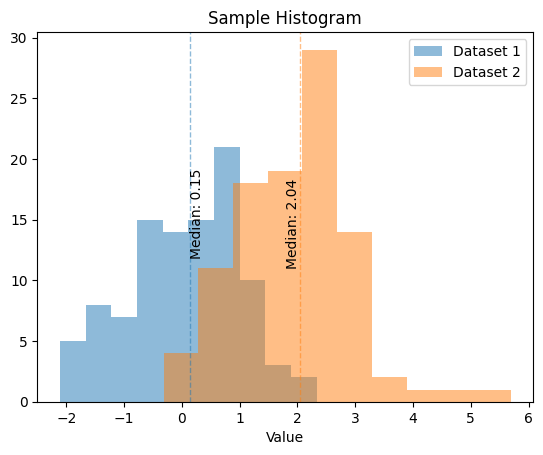

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import os
from pathlib import Path

def create_directory(path):
    if not os.path.exists(path):
        os.makedirs(path)

def hist_plotter(datasets, title, labels=None, path=None, bins=None, xlabel=None, dists=None):
    n = len(datasets) 
    if labels is None:
        labels = [f"Software {str(i+1)}" for i in range(len(datasets))]
    
    if bins is None:
        bins = n * [10]
    
    if dists is None:
        dists = n * [1]

    direction = ["left", "right"]
    plt.figure()
    for i, data in enumerate(datasets):

        if data.ndim == 1:
            data = data.reshape(-1,1) 
        hist_data = plt.hist(data, alpha=0.5, bins=bins[i], label=labels[i])
        color = hist_data[2][0].get_facecolor()
        median = np.median(data)
        plt.axvline(median, linestyle="dashed", color=color, linewidth=1)
        plt.text(median, dists[i] + plt.ylim()[1] / 2, f"Median: {median:.2f}", ha=direction[i%2], rotation=90)
        
    plt.title(title)
    plt.legend()

    if xlabel:
        plt.xlabel(xlabel)
    
    if path:
        create_directory(path)
        plt.savefig(os.path.join(path, f"{title}.png"))
    plt.show()

# Example usage:
datasets = [np.random.randn(100), np.random.randn(100) + 2]
hist_plotter(datasets, title="Sample Histogram", labels=["Dataset 1", "Dataset 2"], xlabel="Value", dists=[1,-4], path=Path("."))


In [ ]:
np.random.randn(100).reshape(-1,1).shape

In [ ]:
hist_plotter([np.mean(FSL_all, axis=1)], "Mean of Framewise Displacement Per Subject ", bins=10, labels=["FSL"])

In [ ]:
np.mean(FSL_all, axis=1).shape

In [ ]:
hist_plotter([np.mean(ANTS_all, axis=1)], "Mean of Framewise Displacement Per Subject ", bins=10, labels=["FSL"], path=Path("."))

In [ ]:
[np.mean(FSL_all, axis=1), np.mean(ANTS_all, axis=1)]

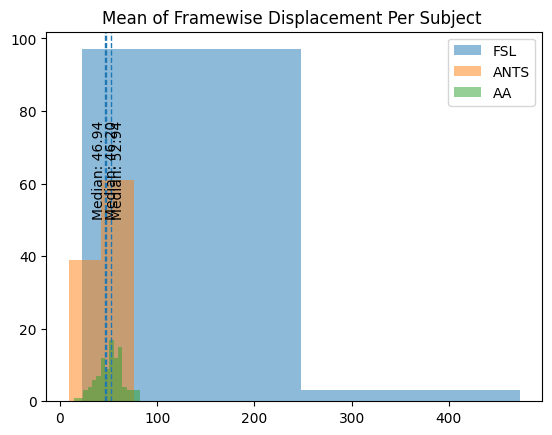

In [135]:
hist_plotter([np.mean(FSL_all, axis=1), np.mean(ANTS_all, axis=1), np.mean(ANTS_all, axis=1)+6], "Mean of Framewise Displacement Per Subject ",  labels=["FSL", "ANTS", "AA"], bins=[2, 2, 15])

In [ ]:
def hist_plotter(data_1, data_2, title, labels=None, path=None, bins=[10, 10], s=10, xlable=None):

    if labels is None:
        labels = ["Software 1", "Software 2"]

    if data_1.ndim == 1:
        data_1 = data_1.reshape(-1, 1)
        data_2 = data_2.reshape(-1, 1)

    dims = data_1.shape[-1]

    for i in range(dims):
        plt.subplot(1, dims, i + 1)
        plt.hist(data_1[:, i], color="r", alpha=0.2, bins=bins[0], label=labels[0])
        plt.hist(data_2[:, i], color="b", alpha=0.2, bins=bins[1], label=labels[1])
        median1 = np.median(data_1[:, i])
        median2 = np.median(data_2[:, i])
        plt.axvline(median1, color="r", linestyle="dashed", linewidth=1)
        plt.axvline(median2, color="b", linestyle="dashed", linewidth=1)
        plt.text(median1, plt.ylim()[1] / 2, f"Median: {median1:.2f}", color="r", ha="right", rotation=90)
        plt.text(median2 * s, plt.ylim()[1] / 2, f"Median: {median2:.2f}", color="b", ha="left", rotation=90)
        if i == 1 or (i == 0 and dims == 1):
            plt.title(title)
        plt.legend()

        if xlable:
            plt.xlabel(xlable)

        plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.75, hspace=0.75)
        plt.tight_layout()

        if path:
            create_directory(path)
            plt.savefig(path / f"{title}.png")
        plt.show()

In [127]:
path = "/home/niusham/projects/rrg-jbpoline/niusham/mca_linear_registration/outputs_plots/diagrams"
path = Path(path)
ANTS_mad_fine_PD = np.loadtxt(path/ "ANTS_mad_fine_PD.txt")
ANTS_mad_fine_HC = np.loadtxt(path / "ANTS_mad_fine_HC.txt")

ANTS_mad_failed_PD = np.loadtxt(path / "ANTS_mad_failed_PD.txt")
ANTS_mad_failed_HC = np.loadtxt(path / "ANTS_mad_failed_HC.txt")

ANTS_mad_all_PD = np.loadtxt(path / "ANTS_mad_all_PD.txt")
ANTS_mad_all_HC = np.loadtxt(path / "ANTS_mad_all_HC.txt")

FSL_mad_fine_PD = np.loadtxt(path / "FSL_mad_fine_PD.txt")
FSL_mad_fine_HC = np.loadtxt(path/ "FSL_mad_fine_HC.txt")

FSL_mad_failed_PD = np.loadtxt(path/ "FSL_mad_failed_PD.txt")
FSL_mad_failed_HC = np.loadtxt(path/ "FSL_mad_failed_HC.txt")

FSL_mad_all_PD = np.loadtxt(path / "FSL_mad_all_PD.txt")
FSL_mad_all_HC = np.loadtxt(path / "FSL_mad_all_HC.txt")

/tmp/ipykernel_4146161/2964704483.py:6: UserWarning: loadtxt: input contained no data: "/home/niusham/projects/rrg-jbpoline/niusham/mca_linear_registration/outputs_plots/diagrams/ANTS_mad_failed_PD.txt"
  ANTS_mad_failed_PD = np.loadtxt(path / "ANTS_mad_failed_PD.txt")


In [128]:
FSL_mad_fine = np.concatenate([FSL_mad_fine_PD, FSL_mad_fine_HC])
ANTS_mad_fine = np.concatenate([ANTS_mad_fine_HC, ANTS_mad_fine_PD])

FSL_mad_fail = np.concatenate([FSL_mad_failed_PD, FSL_mad_failed_HC])
ANTS_mad_fail = np.concatenate([ANTS_mad_failed_HC])

In [ ]:
hist_plotter(FSL_mad_fine, FSL_mad_fail, "Mean Absolute Difference of FD for FSL", s=1.1, bins=[5,5], labels=["Passed", "Failed"], xlable="(mm)")

In [ ]:
hist_plotter(ANTS_mad_fine, ANTS_mad_fail, "Mean Absolute Difference of FD for ANTS", s=1.1, bins=[15,10], labels=["Passed", "Failed"], xlable="(mm)")

In [ ]:
np.mean(ANTS_mad_fine)

In [ ]:
np.max(ANTS_mad_fine)

In [ ]:
ANTS_mad_fine[ANTS_mad_fine > 0.25]

In [ ]:
np.mean(FSL_mad_fine)

In [ ]:
np.max(FSL_mad_fine)

In [ ]:
FSL_mad_fine[FSL_mad_fine > 0.25]

In [129]:
dir = "/home/niusham/projects/rrg-jbpoline/niusham/mca_linear_registration/outputs_plots/diagrams"
ANTS_FD_HC_fine = np.loadtxt((dir+"/ANTS_FD_HC_fine.txt"))
ANTS_FD_PD_fine = np.loadtxt((dir+"/ANTS_FD_PD_fine.txt"))

FSL_FD_HC_fine = np.loadtxt((dir+"/FSL_FD_HC_fine.txt"))
FSL_FD_PD_fine = np.loadtxt((dir+"/FSL_FD_PD_fine.txt"))

ANTS_FD_HC_fail = np.loadtxt((dir+"/ANTS_FD_HC_failed.txt"))
ANTS_FD_PD_fail = np.loadtxt((dir+"/ANTS_FD_PD_failed.txt"))

FSL_FD_HC_fail = np.loadtxt((dir+"/FSL_FD_HC_failed.txt"))
FSL_FD_PD_fail = np.loadtxt((dir+"/FSL_FD_PD_failed.txt"))

/tmp/ipykernel_4146161/3385825616.py:9: UserWarning: loadtxt: input contained no data: "/home/niusham/projects/rrg-jbpoline/niusham/mca_linear_registration/outputs_plots/diagrams/ANTS_FD_PD_failed.txt"
  ANTS_FD_PD_fail = np.loadtxt((dir+"/ANTS_FD_PD_failed.txt"))


In [130]:
dir = "/home/niusham/projects/rrg-jbpoline/niusham/mca_linear_registration/outputs_plots/diagrams"
ANTS_FD_HC_fine_re = np.loadtxt((dir+"/ANTS_new_FD_HC_fine.txt"))
ANTS_FD_PD_fine_re = np.loadtxt((dir+"/ANTS_new_FD_PD_fine.txt"))

FSL_FD_HC_fine_re = np.loadtxt((dir+"/FSL_new_FD_HC_fine.txt"))
FSL_FD_PD_fine_re = np.loadtxt((dir+"/FSL_new_FD_PD_fine.txt"))

ANTS_FD_HC_fail_re = np.loadtxt((dir+"/ANTS_new_FD_HC_failed.txt"))
ANTS_FD_PD_fail_re = np.loadtxt((dir+"/ANTS_new_FD_PD_failed.txt"))

FSL_FD_HC_fail_re = np.loadtxt((dir+"/FSL_new_FD_HC_failed.txt"))
FSL_FD_PD_fail_re = np.loadtxt((dir+"/FSL_new_FD_PD_failed.txt"))

/tmp/ipykernel_4146161/3865974528.py:9: UserWarning: loadtxt: input contained no data: "/home/niusham/projects/rrg-jbpoline/niusham/mca_linear_registration/outputs_plots/diagrams/ANTS_new_FD_PD_failed.txt"
  ANTS_FD_PD_fail_re = np.loadtxt((dir+"/ANTS_new_FD_PD_failed.txt"))


In [131]:
FSL_fine = np.concatenate([FSL_FD_HC_fine, FSL_FD_PD_fine])
ANTS_fine = np.concatenate([ANTS_FD_HC_fine, ANTS_FD_PD_fine])

FSL_fail = np.concatenate([FSL_FD_HC_fail, FSL_FD_PD_fail])
ANTS_fail = np.concatenate([ANTS_FD_HC_fail])

In [132]:
FSL_all = np.concatenate([FSL_fine,FSL_fail])
ANTS_all = np.concatenate([ANTS_fine,ANTS_fail])

In [133]:
FSL_fine_ref = np.concatenate([FSL_FD_HC_fine_re, FSL_FD_PD_fine_re])
ANTS_fine_ref = np.concatenate([ANTS_FD_HC_fine_re, ANTS_FD_PD_fine_re])

FSL_fail_re = np.concatenate([FSL_FD_HC_fail_re, FSL_FD_PD_fail_re])
ANTS_fail_re = np.concatenate([ANTS_FD_HC_fail_re])

In [ ]:
hist_plotter(np.std(FSL_all, axis=1), np.std(ANTS_all, axis=1), "Standard Deviation of Framewise Displacement Per Subject ", bins=[2,20], s=1.1, labels=["FSL", "ANTS"], xlable="(mm)")

In [ ]:
hist_plotter(np.mean(FSL_all, axis=1), np.mean(ANTS_all, axis=1), "Mean of Framewise Displacement Per Subject ", bins=[15,4], s=1.1, labels=["FSL", "ANTS"], xlable="(mm)")

In [ ]:
hist_plotter(np.std(FSL_fine, axis=1), np.std(FSL_fail, axis=1), "Standard Deviation of Framewise Displacement FSL", s=1.1, labels=["Passed", "Failed"], xlable="(mm)")

In [ ]:
hist_plotter(np.mean(FSL_fine, axis=1), np.mean(FSL_fail, axis=1), "Mean of Framewise Displacement FSL", s=1.1, labels=["Passed", "Failed"], xlable="(mm)")

In [ ]:
hist_plotter(np.std(ANTS_fine, axis=1), np.std(ANTS_fail, axis=1), "Standard Deviation of Framewise Displacement ANTS ", bins=[10,1], s=1.1, labels=["Passed", "Failed"],xlable="(mm)")

In [ ]:
hist_plotter(np.mean(ANTS_fine, axis=1), np.mean(ANTS_fail, axis=1), "Mean of Framewise Displacement ANTS ", bins=[10,1], s=1.1, labels=["Passed", "Failed"], xlable="(mm)")

In [ ]:
hist_plotter(np.mean(FSL_fine_ref, axis=1), np.mean(ANTS_fine_ref, axis=1), "Mean of Framewise Displacement (IEEE Reference) Per Subject ", bins=[1,25], s=1.1, labels=["FSL", "ANTS"], xlable="(mm)")

In [ ]:
hist_plotter(np.std(FSL_fine_ref, axis=1), np.std(ANTS_fine_ref, axis=1), "Standard Deviation of Framewise Displacement (IEEE Reference) Per Subject ", bins=[1,25], s=1.1, labels=["FSL", "ANTS"], xlable="(mm)")

In [ ]:
hist_plotter(np.mean(FSL_fine_ref, axis=1), np.mean(FSL_fail_re, axis=1), "Mean of Framewise Displacement (IEEE Reference) FSL", s=1.1, labels=["Passed", "Failed"], xlable="(mm)", bins=[5,20])

In [ ]:
hist_plotter(np.std(FSL_fine_ref, axis=1), np.std(FSL_fail_re, axis=1), "Standard Deviation of Framewise Displacement (IEEE Reference) FSL", s=1.1, labels=["Passed", "Failed"], xlable="(mm)", bins=[5,20])

In [ ]:
hist_plotter(np.mean(ANTS_fine_ref, axis=1), np.mean(ANTS_fail_re, axis=1), "Mean of Framewise Displacement (IEEE Reference) ANTS", s=1.1, labels=["Passed", "Failed"], xlable="(mm)", bins=[5,10])

In [ ]:
hist_plotter(np.std(ANTS_fine_ref, axis=1), np.std(ANTS_fail_re, axis=1), "Standard Deviation of Framewise Displacement (IEEE Reference) ANTS", s=1.1, labels=["Passed", "Failed"], xlable="(mm)", bins=[20,10])

In [ ]:
np.median(ANTS_fine_ref)

In [ ]:
hist_plotter(np.std(FSL_fine_ref, axis=1), np.std(ANTS_fine_ref, axis=1), "Mean of Framewise Dsiaplacment (IEEE Reference) Per Subject ", bins=[1,25], s=1.1, labels=["FSL", "ANTS"])

In [ ]:
import pandas as pd

In [ ]:
a = pd.read_csv("fds.csv",index_col=0)
a["new_fd"]

In [ ]:
import pandas as pd
import ast

# Load the data
a = pd.read_csv("fds.csv", index_col=0)
# a = pd.read_csv("fds_fsl.csv", index_col=0)

# Function to convert the malformed string list to a proper list
def convert_to_list(string):
    # Remove brackets and split by space, then filter empty strings
    elements = string.strip('[]').split()
    # Convert elements to float
    return [float(element) for element in elements]

# Apply the function to each element in the 'new_fd' column
a['new_fd'] = a['new_fd'].apply(convert_to_list)

# Check the data
print(a.head())


In [ ]:
# Explode the 'new_fd' column into multiple rows
a_exploded = a.explode('new_fd')

# Convert the elements in 'new_fd' to numeric type
a_exploded['new_fd'] = pd.to_numeric(a_exploded['new_fd'])

print(a_exploded.head())


In [ ]:
len(a)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the boxplot
plt.figure(figsize=(40, 6))
sns.boxplot(data=a_exploded.reset_index()
, x='index', y='new_fd')
plt.xticks(rotation=90)
plt.title('Boxplot of Framewise Displacement by Subject')
plt.ylabel('Framewise Displacement')
plt.xlabel('Subject ID')
plt.tight_layout()
plt.show()


In [1]:
import numpy as np

In [20]:
spm_a = np.loadtxt("/home/niusham/projects/rrg-jbpoline/niusham/mca_linear_registration/outputs_plots/diagrams/spm/MNI152NLin2009cAsym_res-01/FD_all.txt")
spm_c = np.loadtxt("/home/niusham/projects/rrg-jbpoline/niusham/mca_linear_registration/outputs_plots/diagrams/spm/MNI152NLin2009cSym_res-1/FD_all.txt")

In [21]:
import matplotlib.pyplot as plt

(array([ 8.,  5., 11., 17., 18., 16., 11.,  4.,  8.,  2.]),
 array([-25.0715869 , -24.01611954, -22.96065219, -21.90518483,
        -20.84971748, -19.79425012, -18.73878277, -17.68331541,
        -16.62784806, -15.5723807 , -14.51691335]),
 <BarContainer object of 10 artists>)

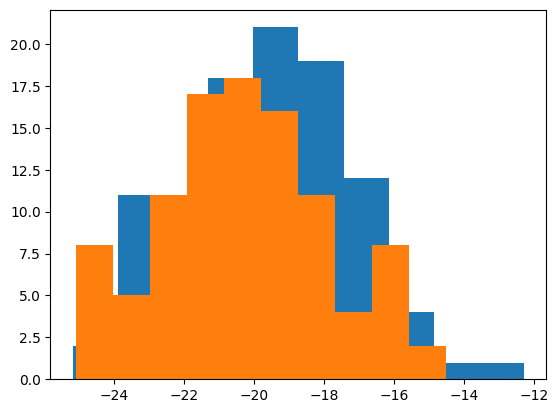

In [22]:
plt.hist(np.log(np.std(spm_a, axis=1)))
plt.hist(np.log(np.std(spm_c, axis=1)))

In [23]:
np.argmax(np.std(spm_a, axis=1))

18

In [29]:
np.delete(spm_a, [82,18],axis=0).shape

(98, 10)

In [28]:
np.argmax(np.std(np.delete(spm_a, 18,axis=0), axis=1))

82

In [25]:
spm_c.shape

(100, 10)

In [30]:
from scipy import stats
stats.ttest_rel(np.log(np.std(np.delete(spm_a, [82,18],axis=0), axis=1)),np.log(np.std(np.delete(spm_c, [82,18],axis=0), axis=1)))

TtestResult(statistic=2.081655138459311, pvalue=0.04000739303720645, df=97)